In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def scale(im, qualtile_clip=False):
    sorted_int_values = np.sort(np.reshape(im, [-1]))
    if qualtile_clip:
        low5, high95 = int(len(sorted_int_values) * 0.025), int(len(sorted_int_values) * 0.9975)
        im_clipped = np.clip(im, a_min=sorted_int_values[low5], a_max=sorted_int_values[high95])
    else:
        im_clipped = im
    im_clipped /= np.max(im_clipped)
    im_clipped = np.clip(im_clipped, -0.2, 2)
    return im_clipped


In [3]:
folder_figures = './PaperFigures/Figure3/'

# Arm dataset

In [2]:
file_gt_bp = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_MultiGT_BP//Reconstructions/arm_multi_sigmat_multisegment///arm_multi_sigmat_multisegment.h5'
gt_rec_bp = h5py.File(file_gt_bp, 'r')
multi_GT_bp = gt_rec_bp['BackProjection']

file_gt_bp_lin = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_LinearGT_BP//Reconstructions/arm_linear_sigmat_multisegment//arm_linear_sigmat_multisegment.h5'
gt_rec_bp_lin = h5py.File(file_gt_bp_lin, 'r')
linear_GT_bp = gt_rec_bp_lin['BackProjection']

In [4]:
file_gt_en = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_MultiGT_EN/Reconstructions/arm_multi_sigmat_multisegment/arm_multi_sigmat_multisegment.h5'
gt_rec_en = h5py.File(file_gt_en, 'r')
multi_GT_en = gt_rec_en['ElasticNet 1e-5']

file_linbm_en = '/home/anna/ResultsSignalDA/MIAvalidation_olddataset/Benchmark_LinearGT_EN/Reconstructions/arm_linear_sigmat_multisegment/arm_linear_sigmat_multisegment.h5'
linbm_rec_en = h5py.File(file_linbm_en, 'r')
linear_GT_en = linbm_rec_en['ElasticNet 1e-5']

In [4]:
# file_unet = '//home/anna/ResultsSignalDA/UNet-BM//CorrectScale_l1_BN_2022-12-12/test_arm.h5'
# f_unet = h5py.File(file_unet, 'r')
# unet = f_unet['output']

In [29]:
idx_test = [0, 1, 28, 29, 139, 142, 168, 204, 285, 428, 570, 713, 856, 998, 1141, 1284, 1426,
            1569, 1712, 1854, 1997, 2140, 2282, 2425, 2568, 2710, 2853, 2996, 3138, 
            3281, 3424, 3566, 3709, 3851, 3994, 4137, 4280, 4422]

for idx in idx_test:
    batch = idx // 256
    i = idx % 256
    folder_rec = '/home/anna/ResultsSignalDA/MIAvalidation/signal//MIAstyleLinear__2022-12-03/' #'/home/anna/ResultsSignalDA/MIAvalidation_olddataset/reconstruction//MIAstyleLinear__2022-12-09/'
    file_input = f'{folder_rec}/real_{batch}.h5'
    # file_plot = f'/home/anna/ResultsSignalDA/comparison_imgs/batch_{batch}_idx_{i}.png'
    rec = h5py.File(file_input, 'r')
    # rec_bp = rec['BackProjection']
    # rec_en = rec['ElasticNet 1e-5']

    signal = rec['sigmat_multisegment']
    signalPred = rec['signal_with_RC']

    plot_signal(signal[i], 'GT', True)
    plot_signal(signalPred[i], 'rec', True)

<ipython-input-27-13f1e2551b70>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10,10))


In [14]:
folder_rec = '/home/anna/ResultsSignalDA/MIAvalidation/signal//MIAstyleLinear__2022-12-03/' #'/home/anna/ResultsSignalDA/MIAvalidation_olddataset/reconstruction//MIAstyleLinear__2022-12-09/'
file_input = f'{folder_rec}/real_{batch}.h5'
# file_plot = f'/home/anna/ResultsSignalDA/comparison_imgs/batch_{batch}_idx_{i}.png'
rec = h5py.File(file_input, 'r')
# rec_bp = rec['BackProjection']
# rec_en = rec['ElasticNet 1e-5']

signal = rec['sigmat_multisegment']
signalPred = rec['signal_with_RC']


In [15]:
from dataLoader import sigMatFilter, sigMatNormalizeTensor
import torch

In [64]:
# i = 661
# i = 11
i = 1106

11

In [ ]:
figure_idx = [0]

In [27]:
idx_use = list(range(524, 1480))

def plot_signal(y_syn, name='', save=False):
    s = sigMatFilter(np.expand_dims(y_syn, axis=2))[:, :, 0]
    s = -sigMatNormalizeTensor(torch.Tensor(y_syn))

    plt.figure(figsize=(10,10))
    plt.imshow(s, cmap='gray')
    plt.tight_layout()
    plt.axis('off')
    
    if save:
        fname = f'{folder_figures}/batch_{batch}_idx_{i}_signal_{name}.png'
        plt.savefig(fname, dpi=600)

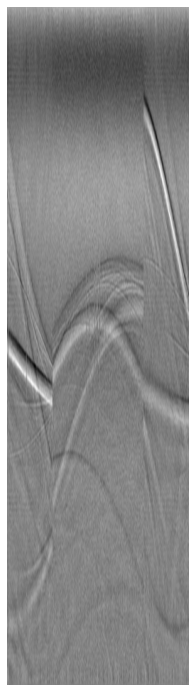

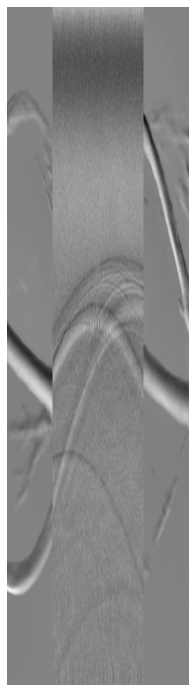

In [28]:
plot_signal(signal[i], 'GT', True)
plot_signal(signalPred[i], 'rec', True)

#